In [1]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(m):
    xx = np.linspace(0, x_1[len(x_1)-1], x_1[len(x_1)-1]*100)[:,None]
    mean, var = m.predict(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(x_1, p2_1, 'ko', mew=1)
    plt.plot(xx, mean, 'b', lw=1)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(0, x_1[len(x_1)-1])

In [3]:
mat_file = io.loadmat('2014_Dataset1.mat')
t = mat_file['t']
p1 = mat_file['p1']
p2 = mat_file['p2']
t = t*24

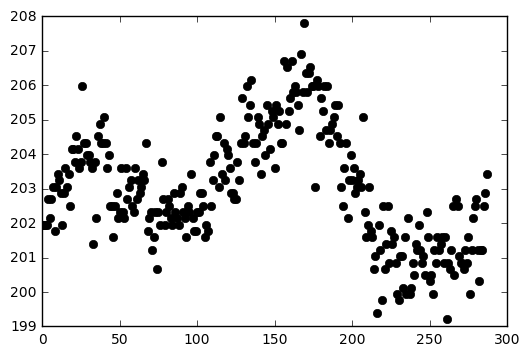

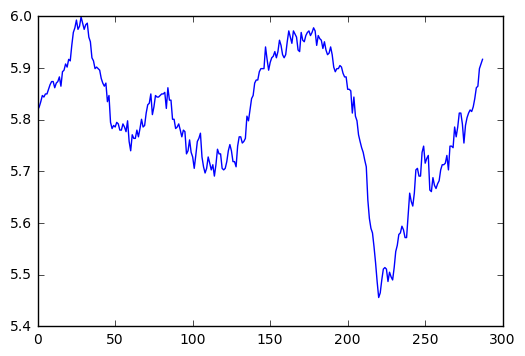

In [4]:
x_1 = np.arange(288)[:,None]
p2_1 = p2[0:288]
plt.plot(x_1, p2_1,'ko')
plt.show()
p1_1 = p1[0:288]
plt.plot(x_1, p1_1)
plt.show()

In [5]:
kernel = GPy.kern.RBF(input_dim=1)
t_1 = t[0:288]
x_1 = np.arange(0,288,1)
x_1 = np.reshape(x_1,[len(x_1),1])
p2_1 = p2[0:288]
m = GPy.models.GPRegression(x_1, p2_1, kernel)
m.optimize()

 C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


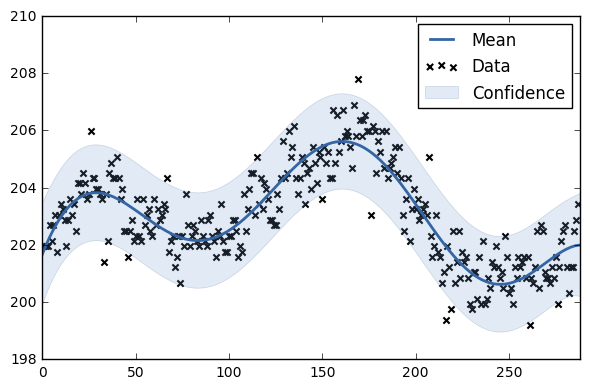

In [6]:
fig = m.plot()
plt.axis([0,288,198,210])
plt.show()

In [12]:
newX = np.arange(0,10,0.5)[:,None]
mu, var = m.predict(newX)

In [14]:
var

array([[ 0.81964933],
       [ 0.81051847],
       [ 0.80216131],
       [ 0.79452513],
       [ 0.78755998],
       [ 0.78121864],
       [ 0.77545643],
       [ 0.77023117],
       [ 0.76550305],
       [ 0.76123455],
       [ 0.75739029],
       [ 0.75393701],
       [ 0.75084343],
       [ 0.74808016],
       [ 0.74561965],
       [ 0.74343607],
       [ 0.74150524],
       [ 0.73980456],
       [ 0.73831294],
       [ 0.73701071]])

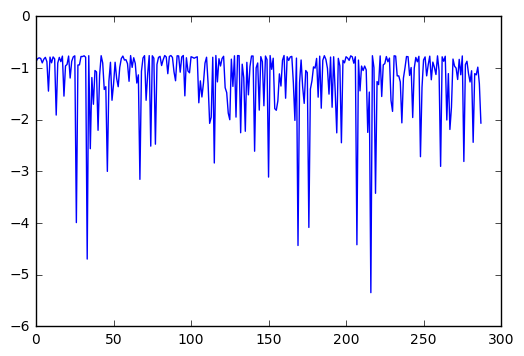

In [11]:
k = m.log_predictive_density(x_1, p2_1)
plt.plot(x_1,k)
plt.show()

In [12]:
m

GP_regression.,value,constraints,priors
rbf.variance,17101.873761,+ve,
rbf.lengthscale,111.465373502,+ve,
Gaussian_noise.variance,0.708149990439,+ve,


In [7]:
import pickle
f = open('hyperparameter','wb')
pickle.dump(m,f)
f.close()